In [2]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# ---- params ----

# income
income = 100 * 1e3  # K

# number of people living in a house
people = 4

# amount of time that can be spent on the pet
std = 1
free_time = 2
pet_time = 2

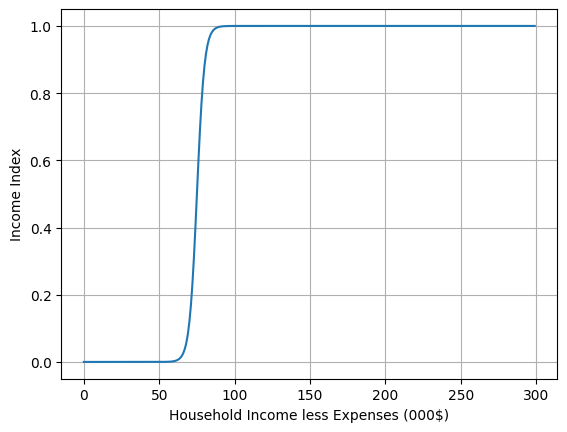

In [4]:
# measures whether a family is financially able to provide for a pet
def get_income_index(income, required_income = 75e3, steepness = -0.0004):
    return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300E3, 1E3)
Y = np.array([get_income_index(x) for x in X])

plt.grid()
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1000,Y)

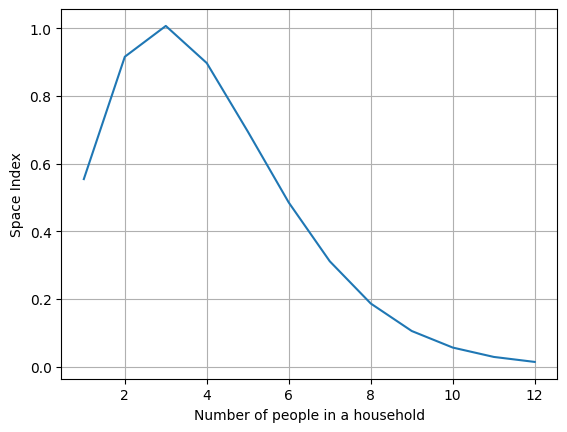

In [17]:
# measures whether there is sufficient space to fit a pet into the household
def get_space_index(number_of_people):
    # poisson distribution to obtain a suitable shape
    return 2 * math.exp(-0.7) * 0.7**(0.4*number_of_people-1) / math.gamma(0.4*number_of_people) 

# TODO:
# can convert to population densitry
# can do a hard cap on land area
# can do housing area in cases of ppl living on a farm

X = np.arange(1,13)
Y = np.array([get_space_index(x) for x in X])

plt.grid()
plt.xlabel("Number of people in a household")
plt.ylabel("Space Index")
plt.plot(X,Y)

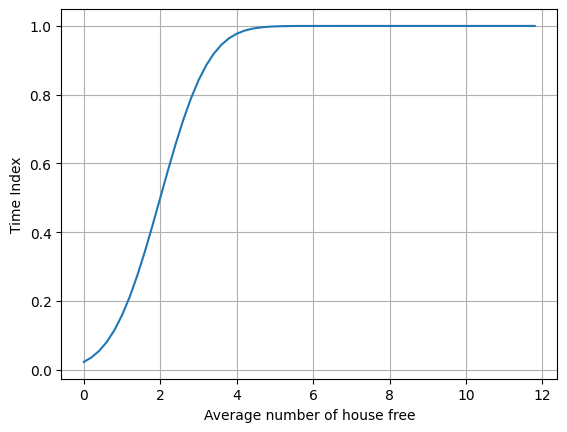

In [28]:
# measures whether someone has the time to take care of a pet
def get_time_index(owner_free_time, pet_time_requirement = 2, free_time_std = 1):
    x = (owner_free_time - pet_time_requirement) / free_time_std
    return norm.cdf(x)

X = np.arange(0, 12, 0.2)
Y = np.array([get_time_index(x) for x in X])

plt.grid()
plt.xlabel("Average number of house free")
plt.ylabel("Time Index")
plt.plot(X,Y)

In [33]:
income_index = get_income_index(income)
space_index = get_space_index(people)
time_index = get_time_index(free_time, pet_time)

income_index, space_index, time_index

(0.9999546021312976, 0.8973888411998545, 0.5)

In [34]:
fitness_index = 1/3 * income_index + 1/3 * space_index + 1/3 * time_index

fitness_index

0.799114481110384